In [1]:
# Hierarchical Modeling: School-Level Clustering

# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
# Load the dataset
df = pd.read_csv('student_scores.csv')

In [3]:
# Aggregate data to school-level summaries
school_summary = df.groupby('school_id').agg({
    'test_score': 'mean',
    'study_hours': 'mean',
    'school_funding': 'first',
    'urban': 'first'
}).reset_index()

In [4]:
# Standardize the features
features = ['test_score', 'study_hours', 'school_funding', 'urban']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(school_summary[features])

In [5]:
# Perform hierarchical clustering
Z = linkage(X_scaled, method='ward')

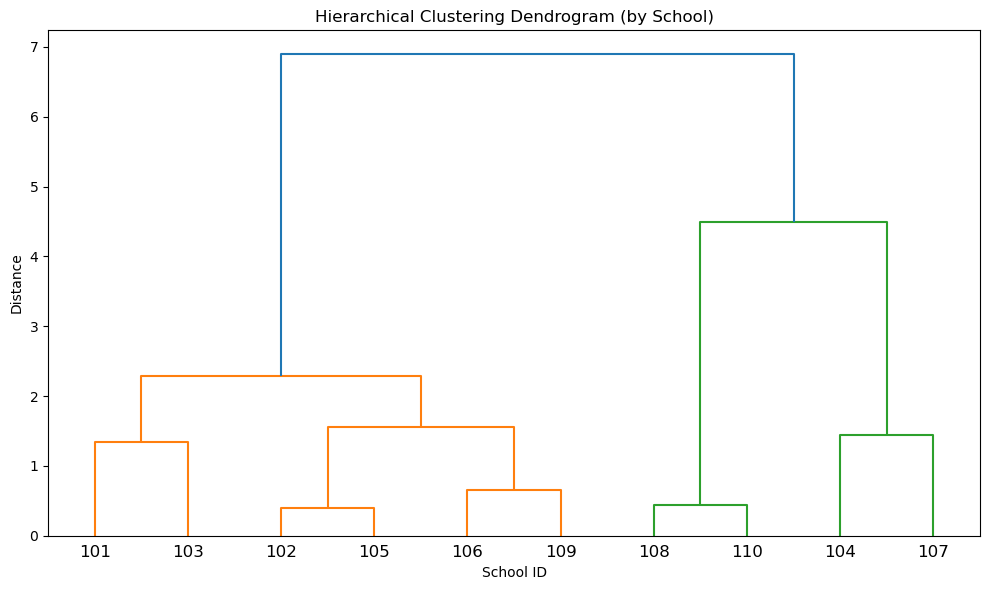

In [6]:
# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=school_summary['school_id'].values)
plt.title('Hierarchical Clustering Dendrogram (by School)')
plt.xlabel('School ID')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [7]:
from scipy.cluster.hierarchy import fcluster

# Cut dendrogram to form 2 clusters
school_summary['cluster'] = fcluster(Z, t=2, criterion='maxclust')


In [8]:
# See the average profile of each cluster
school_summary.groupby('cluster')[features].mean()


,test_score,study_hours,school_funding,urban
cluster,,,,
1,66.000,2.848333,5010.666667,0.0
2,71.275,3.022500,6102.750000,0.5


In [ ]:
# Insight: 
# Cluster 1 appears to group together rural schools with less funding, and that may be linked to slightly lower scores and study time.
# Cluster 2 represents better-funded schools with better test scores, and may include urban schools or a mix of both. These schools seem to support slightly more effective academic environments.